In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train=pd.read_csv("./MNIST/train.csv")
test=pd.read_csv("./MNIST/test.csv")
train=train.values
test=test.values

test_data=test[76,:-1]       #check 478th row, it's an anomaly

def pred(data):
    img=data.reshape((28,28))
    plt.imshow(img,cmap='gray') 
    prox=[]
    for i in range(train.shape[0]):
        prox.append(np.sum(np.abs(train[i,:-1]-data)))
    pred=prox.index(min(prox))
    print("Dobby thinks it\'s a : ",train[pred,-1])

In [ ]:
pred(test_data)

In [ ]:
np.argmax?    #Shows the info about the function

In [ ]:
#This implementation averages out the first K values count and printss the number which is most occur

def predict(data, K=10):            #As per my observation, K=10 is leading to better results
    img=data.reshape((28,28))
    plt.imshow(img,cmap='gray') 
    prox=[]
    for i in range(train.shape[0]):
        prox.append([np.sum(np.abs(train[i,:-1]-data)),train[i,-1]])
    prox.sort()
    counter=np.zeros((10,))
    for i in range(K):
        #print(prox[i][1])
        counter[prox[i][1]]+=1
    print("Dobby thinks it\'s a : ",counter.argmax())

In [ ]:
predict(test[478,:-1])

## Using sklearn

In [46]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train=pd.read_csv("./MNIST/train.csv")
test=pd.read_csv("./MNIST/test.csv")
train=train.values
test=test.values
neighbors=KNeighborsClassifier(n_neighbors=3)
neighbors.fit(train[:9999,:-1], train[:9999,-1])    #fit(X,Y) here X= training dataset features and Y= training dataset results/labels, So number of rows should be equal here

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [48]:
testpoint=test[306,:-1]
neighbors.predict([testpoint])

array([7], dtype=int64)

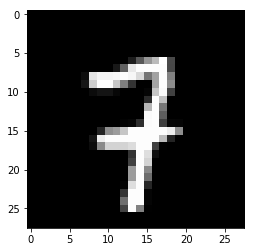

In [49]:
img=testpoint.reshape((28,28))
plt.imshow(img,cmap='gray') 

## Using train_test_split in sklearn

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

test=pd.read_csv("./MNIST/test.csv")
test=test.values
X_train, X_test, y_train, y_test = train_test_split(test[:,:-1], test[:,-1], test_size=0.33, random_state=42)    #0.33 part will become the test dataset with 42 units of random state(cause you don't want the data to be split just into first half and second half)
neighbors=KNeighborsClassifier(n_neighbors=3)
neighbors.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

[7]


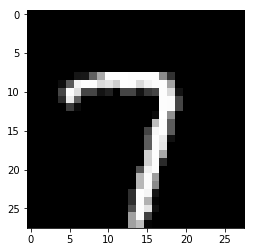

In [63]:
testpoint=X_train[12,:]
print(neighbors.predict([testpoint]))
img=testpoint.reshape((28,28))
plt.imshow(img,cmap='gray')

In [66]:
from sklearn.metrics import accuracy_score

pred=neighbors.predict(X_test)
accuracy_score(y_test,pred)

0.9442424242424242